In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [16]:
data_figure_D = pd.read_csv("../data_for_figures/data_figure_D.csv")
data_figure_D

,Attachment,sIgA_Average_Morning_log,sIgA_Average_Afternoon_log,sIgA_Average_Difference_log,Log-transformed Cortisol (pg/mL)
0,Insecure,3.077296,3.338237,0.260941,1.726332
1,Secure,5.084039,3.847334,-1.236705,0.824175
2,Insecure,3.179553,3.581917,0.402364,0.604316
3,Secure,3.974519,4.178677,0.204158,1.278152
4,Secure,4.392023,3.846883,-0.545141,1.560248
5,Secure,3.751583,3.631229,-0.120354,0.815365
6,Secure,3.417520,3.749981,0.332461,3.124565
7,Insecure,3.262951,2.995264,-0.267687,1.957274


In [17]:
sns.set_theme(style="ticks", context="talk")
plt.rcParams.update({
    "axes.linewidth": 1.1,
    "xtick.major.size": 4, "ytick.major.size": 4,
})

In [18]:
hue_order = ["Insecure", "Secure"]
palette = {"Insecure": "#F79256", "Secure": "#00B2CA"}

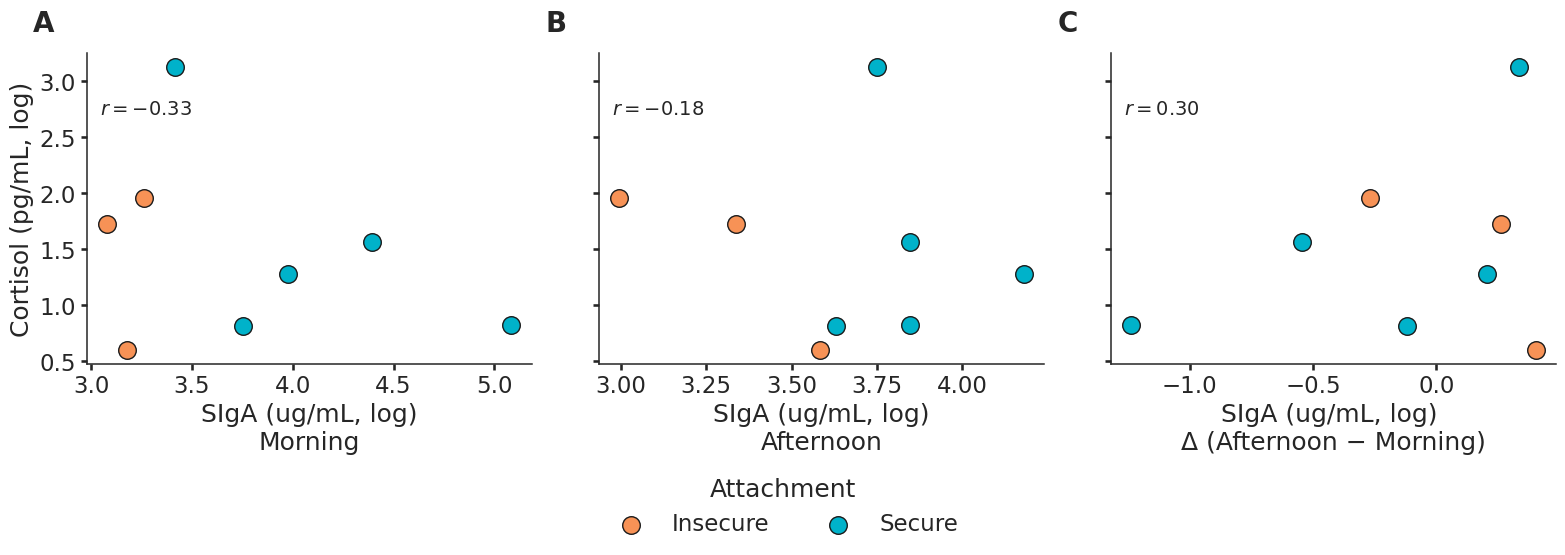

In [23]:

x_vars = [
    ("sIgA_Average_Morning_log",   "SIgA (ug/mL, log)\nMorning"),
    ("sIgA_Average_Afternoon_log", "SIgA (ug/mL, log)\nAfternoon"),
    ("sIgA_Average_Difference_log","SIgA (ug/mL, log) \nΔ (Afternoon − Morning)")
]
y_key  = "Log-transformed Cortisol (pg/mL)"
y_lab  = "Cortisol (pg/mL, log)"

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i, (x_key, x_lab) in enumerate(x_vars):
    ax = axes[i]

    for att in hue_order:
        g = data_figure_D[data_figure_D["Attachment"] == att]
        ax.scatter(
            g[x_key], g[y_key],
            s=160, edgecolor="k", linewidth=1,
            label=att if i == 0 else None,
            color=palette[att]
        )

    valid = data_figure_D[[x_key, y_key]].dropna()
    r, p = pearsonr(valid[x_key], valid[y_key])
    ax.text(
        0.03, 0.85, rf"$r={r:.2f}$",
        transform=ax.transAxes, ha="left", va="top",
        fontsize=14, fontweight="bold"
    )

    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab if i == 0 else "")
    ax.grid(False)
    sns.despine(ax=ax)

axes[0].text(-0.12, 1.05, "A", transform=axes[0].transAxes,
             fontsize=20, fontweight="bold", va="bottom")
axes[1].text(-0.12, 1.05, "B", transform=axes[1].transAxes,
             fontsize=20, fontweight="bold", va="bottom")
axes[2].text(-0.12, 1.05, "C", transform=axes[2].transAxes,
             fontsize=20, fontweight="bold", va="bottom")

handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(
    handles, labels, title="Attachment",
    loc="lower center", bbox_to_anchor=(0.5, -0.15),
    ncol=2, frameon=False
)

plt.subplots_adjust(bottom=0.22, wspace=0.35)

plt.tight_layout()

fig.savefig("../figures_for_paper/figure_03.png", dpi=300, bbox_inches="tight")
